
*Task 1*   **The Sparks Foundation**


**Prediction using Supervised ML**

---

For this task, we will be applying *Linear Regression for predicting* student's percentage based on the Number of study hours

**Data Source**:https://drive.google.com/file/d/1uvub9Ojp4gYQqAm6TKdTz5nBCH_e2Oe8/view?usp=sharing

**Problem statement**: What will be the predicted score if student studies for 9.25 hours/day

 -------------------------------------------------    **[SURAJ S. BHUTE](https://www.linkedin.com/in/surajbhute/)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing all libraries required in this notebook

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


#Import the dataset
*Data Source:https://drive.google.com/file/d/1uvub9Ojp4gYQqAm6TKdTz5nBCH_e2Oe8/view?usp=sharing*
 

In [3]:
train = pd.read_csv("/content/drive/MyDrive/GRIP/student_scores.csv")
train.shape

(25, 2)

In [4]:
train.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Statistical summary

In [5]:
train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes



**Now let's plot a graph of our data so that it will give us clear idea about data.**

#Plotting the distribution of scores

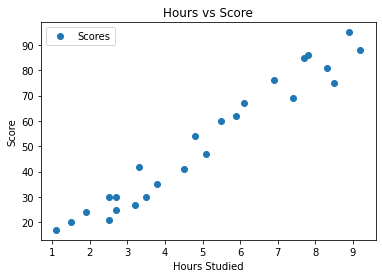

In [16]:
train.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

**By observing the plot, we can clearly observe a strong linear relationship between the 2 variables and can imagine a straight trend line, making them ideal for Linear Regression application**

#Train Test Split

In [8]:
x1 = train.iloc[:,0].values
y1 = train.iloc[:,1].values

x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

# Applying Random Linear Regression Model
*Now we prepare the data and split it in test data*

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

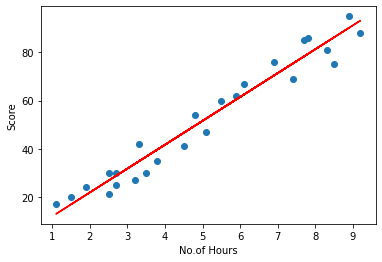

In [15]:
line = linearRegressor.coef_*x+linearRegressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color="red")
plt.xlabel("No.of Hours")  
plt.ylabel("Score")
plt.show()

#Checking the accuracy scores for training and test set

In [14]:
print('Test Score')
print(linearRegressor.score(x_test, y_test))
print('Training Score')
print(linearRegressor.score(x_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211553


#Predictions

In [13]:
print(x_test) # Testing data - In Hours
y_pred = linearRegressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Prediction of Test and Training set result  
y_pred= linearRegressor.predict(x_test)  
x_pred= linearRegressor.predict(x_train)

In [ ]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a date', linearRegressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a date [[93.69173249]]


#Model Evaluation
As we are dealing with numerical data, Mean Absolute Error,Mean Squared Error would be a great choice for a metric for evaluating the Linear Regression model.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
 

Mean Absolute Error: 4.183859899002982
